In [8]:
import simplenote as sn
from io import StringIO
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

simplenote = sn.Simplenote('mohdjamal8453@gmail.com', 'yahusain')
dat=simplenote.get_note('41d06e8ced6c42389127e0d727974230')

tasks=""
curdate=""
for ln in dat[0]['content'].splitlines():
    if '*' not in ln and len(ln.strip())>0:
        curdate=ln.strip()+' '+str(dt.datetime.now().year)
    elif '*' in ln:
        tasks=tasks+"\n"+curdate+","+ln
tasks=tasks.splitlines()

tasks=[ln.replace("*","") for ln in tasks if len(ln.split(","))==5]
tasks=pd.read_csv(StringIO('\n'.join(tasks)),header=None,names=['Date','EndTime','Category','Desc','Duration'])

tasks['Date']=pd.to_datetime(tasks['Date'],format="%b %d %Y")
#tasks

In [9]:
tasks

,Date,EndTime,Category,Desc,Duration
0,2017-11-14,9:55,Quran,Makharij mistake,80
1,2017-11-14,11:10,TM,40 days habit,20
2,2017-11-14,3:30,TM,running notebook giving all metric,40
3,2017-11-13,12:15,TM,monitoring using simple note,15
4,2017-11-13,2:30,TM,monitoring SM,60
5,2017-11-13,5:00,Learn,cheatography make cheatsheet,35
6,2017-11-12,10:05,Quran,Revise,30
7,2017-11-12,5:20,TM,app to monitor FT and goal,10
8,2017-11-12,8:20,TM,add chehlum amal in app and clarify how and e...,30
9,2017-11-12,10:50,Ilm,weekly sabaq revise,60


[]

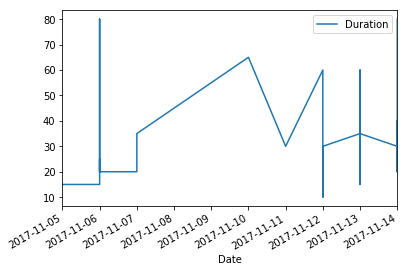

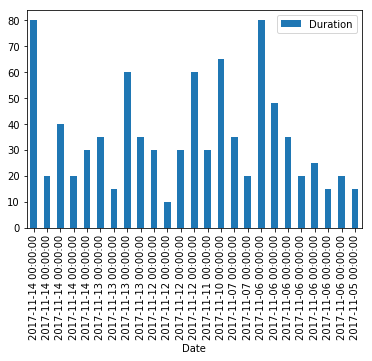

In [6]:
plt.figure()
tasks.plot.line(x='Date',y='Duration').plot()
tasks.plot.bar(x='Date',y='Duration').plot()